# Iris Flower Classification

- **Flowers(variety) :** [1] Versicolor    [2] Virginica     [3] Setosa

- **features :** 1) sepal.length    2)sepal.width     3)petal.length    4)petal.width  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## All Information about the DataSet

In [2]:
iris=pd.read_csv(r"C:\Users\iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Interpretation:

       1)The data set contains only a small number of records(150)
       2)Mean is the average of all data & Standard deviation is the spread of data means how much wide the data is spread along the data set.
       3)Median is the centre value of data & Quantiles are the value of specific feature on nth Percentage 
        n=25,50,75

In [6]:
iris.shape

(150, 5)

In [7]:
iris.size

750

In [8]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [9]:
iris['variety'].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

# Data Visualization

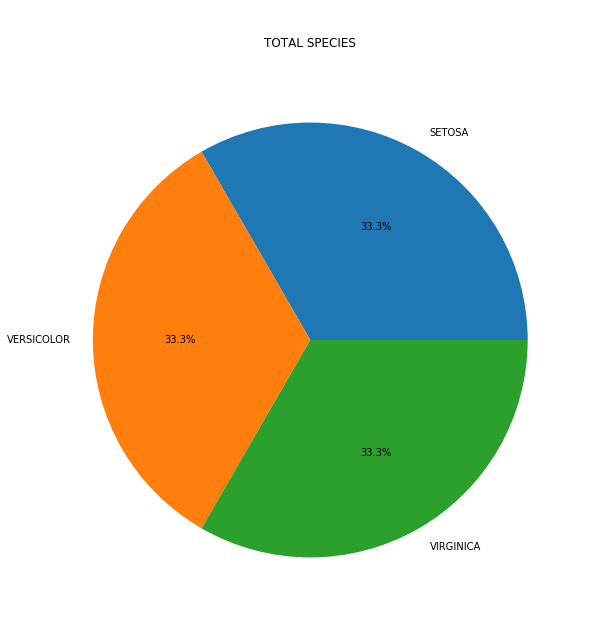

In [10]:
#Pie Chart
varietys_names=['SETOSA','VERSICOLOR','VIRGINICA']
varietys_number=list(iris['variety'].value_counts())
plt.figure(figsize=(10,10))
plt.pie(varietys_number,labels=varietys_names,autopct='%.1f%%')
plt.title("\n\nTOTAL SPECIES\n")
plt.show()

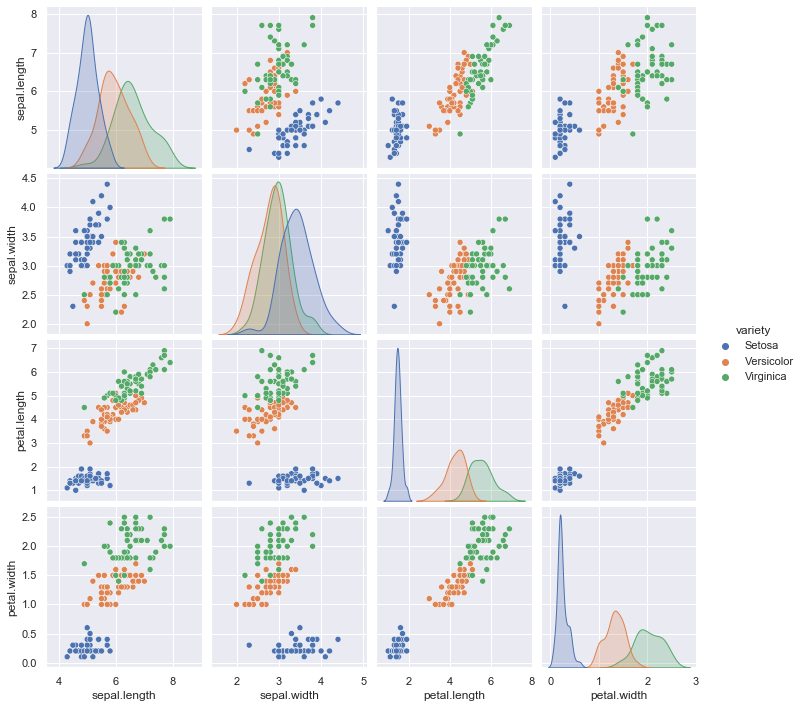

In [11]:
#PAIR PLOT
sns.set(rc={'figure.figsize':(20,10)})
sns.pairplot(iris, hue = 'variety')

setosa is easily seperable from the other two.

But the data point of versicolor and virginica are overlaping so it is not possible here to seperate both the flower.

#### Interpretation:
    
          The petal length and identify and differentiate various flower variety.
          In most scatter plots, Setosa can be linearly separable, and others are a little difficult to separate.

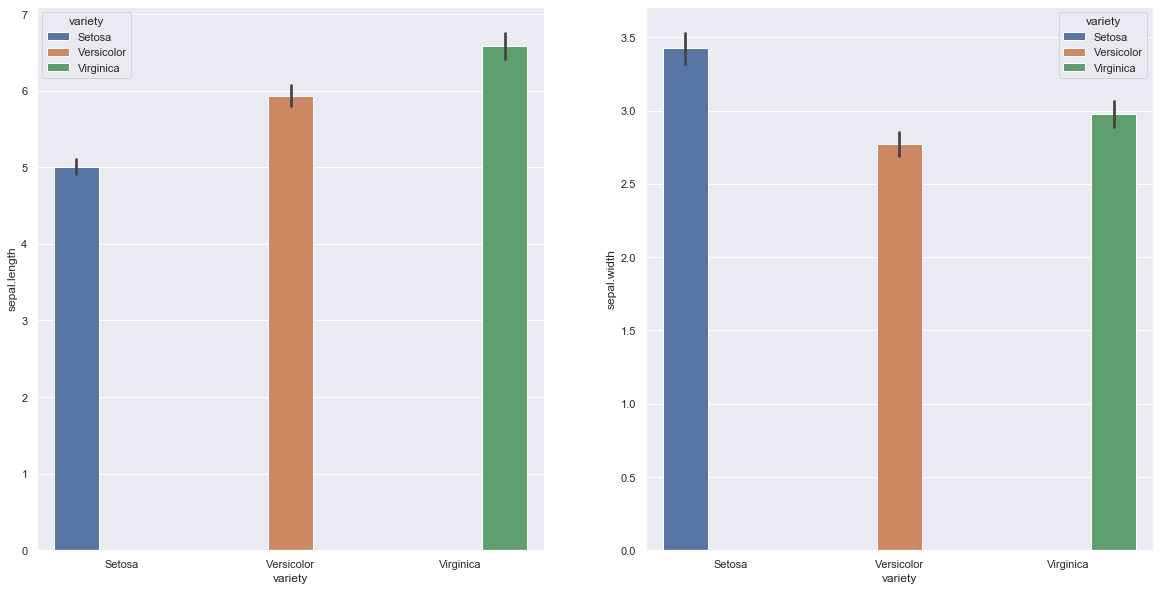

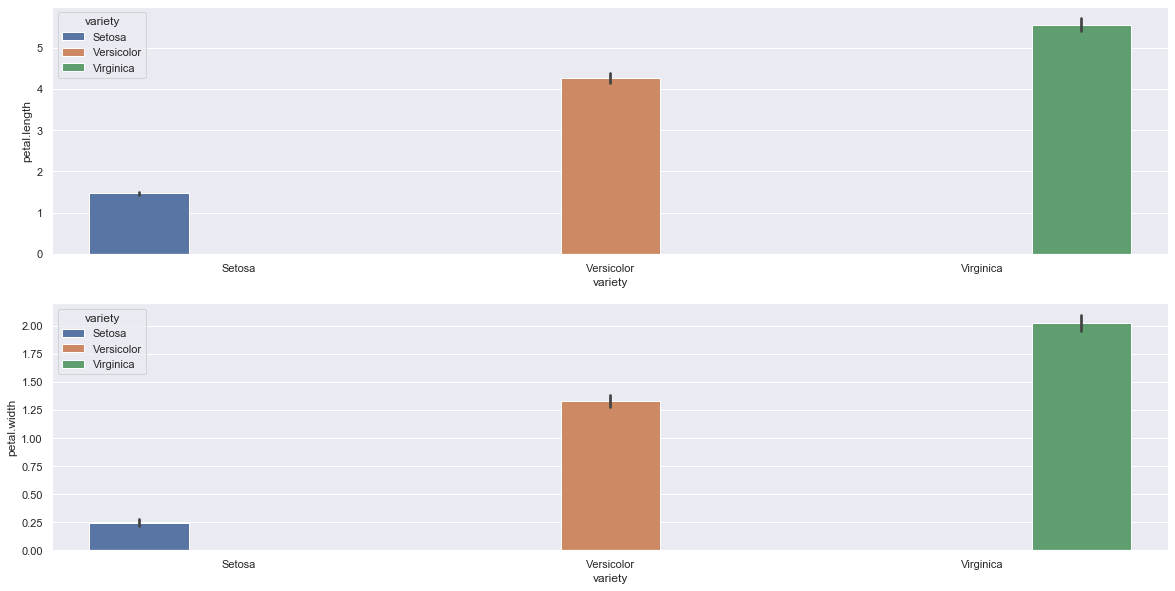

In [16]:
#BAR PLOT BETWEEN SEPAL LENGTH 
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='variety',y='sepal.length',data=iris,hue='variety')

plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='variety',y='sepal.width',data=iris,hue='variety')
plt.show()

plt.subplot(2,1,1)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='variety',y='petal.length',data=iris,hue='variety')

plt.subplot(2,1,2)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='variety',y='petal.width',data=iris,hue='variety')
plt.show()


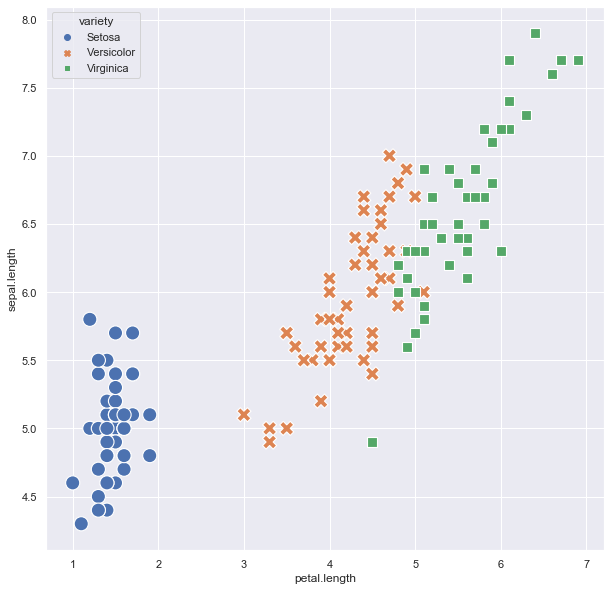

In [17]:
#Scatterplot
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x="petal.length",y="sepal.length",data=iris,style='variety',hue='variety',s=200)
plt.show()

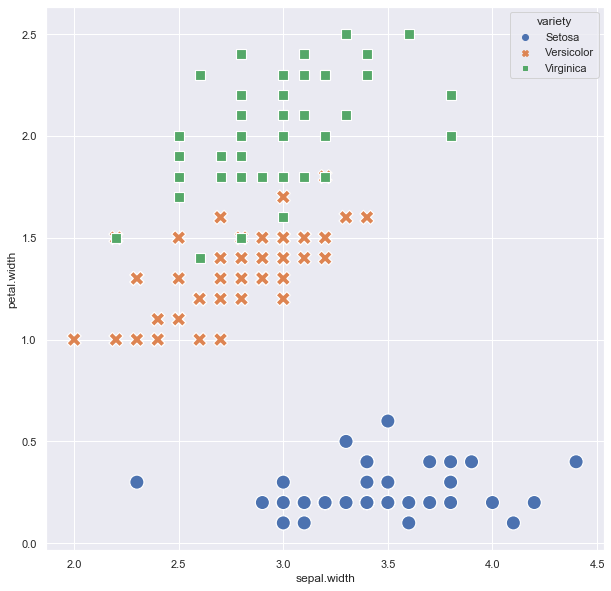

In [18]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x="sepal.width",y="petal.width",data=iris,style='variety',hue='variety',s=200)
plt.show()

NameError: name 'pt' is not defined

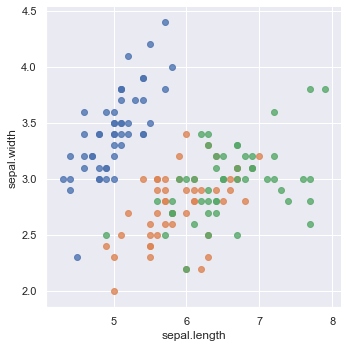

In [19]:
#seaborn.lmplot is used to plot data and regression model fits across a FacetGrid
sb.lmplot( x="sepal.length", y="sepal.width", data=iris, fit_reg=False, hue='variety', legend=False)
pt.legend(loc='lower right')
pt.show()

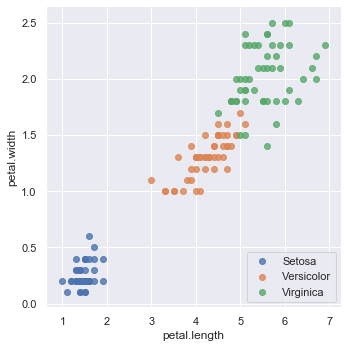

In [21]:
sb.lmplot( x="petal.length", y="petal.width", data=iris, fit_reg=False, hue='variety', legend=False)
plt.legend(loc='lower right')
plt.show()

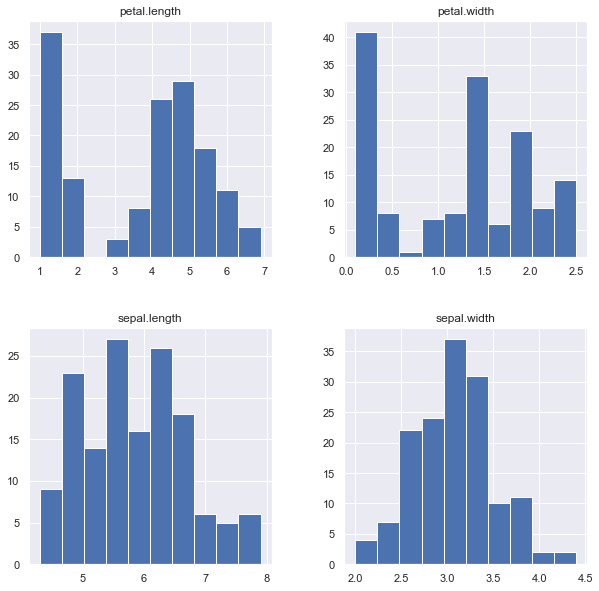

In [23]:
iris.hist()
plt.show()

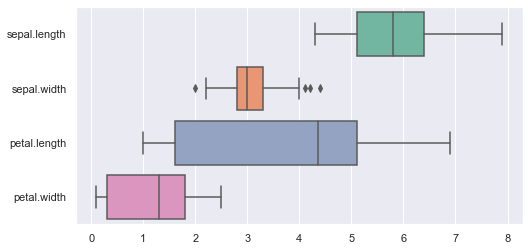

In [26]:
plt.figure(figsize=(8 ,4))
sb.boxplot(data=iris, orient="h", palette="Set2")
plt.show()

#### Heatmap

In [27]:
iris.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


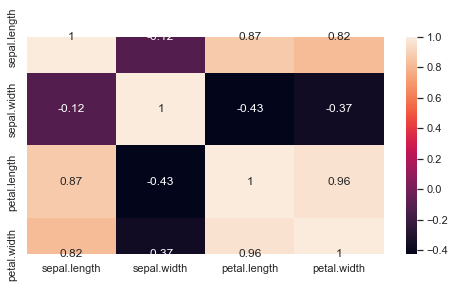

In [30]:
plt.figure(figsize=(8 ,4))
sb.heatmap(iris.corr(), annot=True)
plt.show()

### interpretation:
         Sepal.length and Sepal.Width features are slightly correlated with each other.
         From the heatmap, we see that petal.length and petal.width have a high correlation, 
         petal.width and sepal.length have good correlations.
         petal.length and sepal.length have good correlations.

# Training Of the Model

In [31]:
X=iris.iloc[:,0:4]
Y=iris.iloc[:,4]

In [32]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
Y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=9)

# Using Support Vector Machine

In [35]:
model=SVC()

In [37]:
model.fit(X_train, Y_train)

SVC()

In [38]:
predict = model.predict(X_test)
predict

array(['Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Setosa', 'Virginica'], dtype=object)

In [39]:
print(accuracy_score(Y_test,predict)*100)
#accuracy score

100.0


# Using Decision Tree Classifier

In [41]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [42]:
Predect = model.predict(X_test)
Predect

array(['Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Setosa', 'Virginica'], dtype=object)

In [43]:
print(accuracy_score(Y_test, Predect)*100)

100.0


## K Nearest Neighbors

In [44]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, Y_train)

# Predict the response for test dataset
knn_pred = knn.predict(X_test)

### Model Evaluation

In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix,accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",format(metrics.accuracy_score(Y_test, knn_pred)))

Accuracy_score: 1.0
